In [ ]:
# This is for doing the analysis for FPR 0983 for GPI

# Finalized 2021 July 23 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
stem = "/Users/bandari/Documents/git.repos/gpi2_misc/notebooks_for_development/data/fpr_0983/"

In [3]:
df_large = pd.read_csv(stem + "large_steps.txt", delim_whitespace=True)
df_small = pd.read_csv(stem + "small_steps.txt", delim_whitespace=True)

In [39]:
# calculate best fits

small_cmd_tt = 0.5*np.arange(0,len(df_small["Tip"]))
small_tip_m, small_tip_b = np.polyfit(small_cmd_tt,df_small["Tip"], deg=1)
small_tilt_m, small_tilt_b = np.polyfit(small_cmd_tt,df_small["Tilt"], deg=1)

large_cmd_tt = 10.*np.arange(0,len(df_large["Tip"]))
large_tip_m, large_tip_b = np.polyfit(large_cmd_tt,df_large["Tip"], deg=1)
large_tilt_m, large_tilt_b = np.polyfit(large_cmd_tt,df_large["Tilt"], deg=1)

In [31]:
# plot total moves

def total_movement(title_string,
                best_fit_m_tip,
                best_fit_b_tip,
                best_fit_m_tilt,
                best_fit_b_tilt,
                cmd_tt,
                empir_tip,
                empir_tilt):

    plt.clf()

    # tip
    plt.plot(cmd_tt,np.add(np.multiply(best_fit_m_tip,cmd_tt),best_fit_b_tip), linestyle="--", color="gray")
    plt.plot(cmd_tt,empir_tip, marker="o", label="Tip", color="#ff7f0e")

    # tilt
    displacement_tilt_plot = 190 # amount by which to move tilt down on the plot
    plt.plot(cmd_tt,np.subtract(np.add(np.multiply(best_fit_m_tilt,cmd_tt),best_fit_b_tilt),displacement_tilt_plot), 
             linestyle="--", color="gray")
    plt.plot(cmd_tt,np.subtract(empir_tilt,displacement_tilt_plot), marker="o", 
             label="Tilt-"+str(displacement_tilt_plot), color="#1f77b4")

    # 1-to-1 line
    #plt.plot([0,20], [0,20], linestyle="--", color="k")
    disp_vert = 15
    plt.plot([0,np.max(cmd_tt)], [disp_vert,np.max(cmd_tt)+disp_vert], linestyle="--", color="k", label="1-to-1 line")

    plt.xlim([0,np.max(cmd_tt)])
    plt.xlabel("Step command (mas)")
    plt.ylabel("Tip or Tilt (mas)")
    plt.title(title_string)
    plt.legend()
    
    file_save_string = "test.pdf"
    plt.savefig(file_save_string)

In [32]:
# plot residuals to best fit lines

def plot_resids(title_string,
                best_fit_m_tip,
                best_fit_b_tip,
                best_fit_m_tilt,
                best_fit_b_tilt,
                cmd_tt,
                empir_tip,
                empir_tilt):

    plt.clf()

    # tip
    one2one_y_tip = np.add(np.multiply(best_fit_m_tip,cmd_tt),best_fit_b_tip)
    plt.plot(cmd_tt,np.subtract(empir_tip,one2one_y_tip), marker="o", label="Tip", color="#ff7f0e")

    # tilt
    one2one_y_tilt = np.add(np.multiply(best_fit_m_tilt,cmd_tt),best_fit_b_tilt)
    plt.plot(cmd_tt,np.subtract(empir_tilt,one2one_y_tilt), marker="o", label="Tilt", color="#1f77b4")

    # zero line
    #plt.plot([0,20], [0,20], linestyle="--", color="k")
    plt.plot([0,100], [0,0], linestyle="--", color="k", label="zero")


    #plt.ylim([0,np.max(empir_tilt)])
    plt.xlim([0,np.max(cmd_tt)])
    plt.xlabel("Cumulative commanded position (mas)")
    plt.ylabel("Tip or Tilt (mas)")
    plt.title(title_string)
    plt.legend()

    file_save_string = "test.pdf"
    plt.savefig(file_save_string)

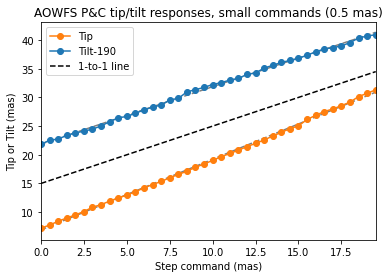

In [33]:
# plot total moves, small commands

total_movement(title_string="AOWFS P&C tip/tilt responses, small commands (0.5 mas)",
                best_fit_m_tip=small_tip_m,
                best_fit_b_tip=small_tip_b,
                best_fit_m_tilt=small_tilt_m,
                best_fit_b_tilt=small_tilt_b,
                cmd_tt=small_cmd_tt,
                empir_tip=df_small["Tip"],
                empir_tilt=df_small["Tilt"])

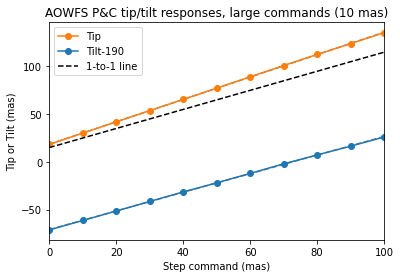

In [34]:
# plot total moves, large commands

total_movement(title_string="AOWFS P&C tip/tilt responses, large commands (10 mas)",
                best_fit_m_tip=large_tip_m,
                best_fit_b_tip=large_tip_b,
                best_fit_m_tilt=large_tilt_m,
                best_fit_b_tilt=large_tilt_b,
                cmd_tt=large_cmd_tt,
                empir_tip=df_large["Tip"],
                empir_tilt=df_large["Tilt"])

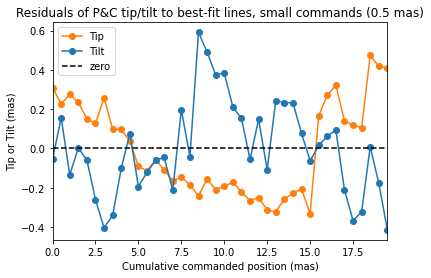

In [35]:
# best-fit comparison, small commands
plot_resids(title_string="Residuals of P&C tip/tilt to best-fit lines, small commands (0.5 mas)",
            best_fit_m_tip=small_tip_m,
            best_fit_b_tip=small_tip_b,
            best_fit_m_tilt=small_tilt_m,
            best_fit_b_tilt=small_tilt_b,
            cmd_tt=small_cmd_tt,
            empir_tip=df_small["Tip"],
            empir_tilt=df_small["Tilt"])

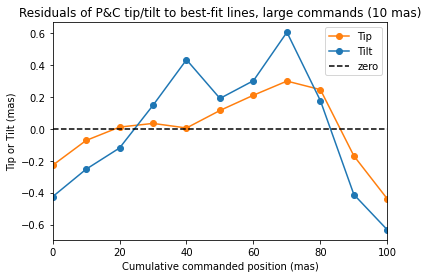

In [36]:
# best-fit comparison, large commands
plot_resids(title_string="Residuals of P&C tip/tilt to best-fit lines, large commands (10 mas)",
            best_fit_m_tip=large_tip_m,
            best_fit_b_tip=large_tip_b,
            best_fit_m_tilt=large_tilt_m,
            best_fit_b_tilt=large_tilt_b,
            cmd_tt=large_cmd_tt,
            empir_tip=df_large["Tip"],
            empir_tilt=df_large["Tilt"])

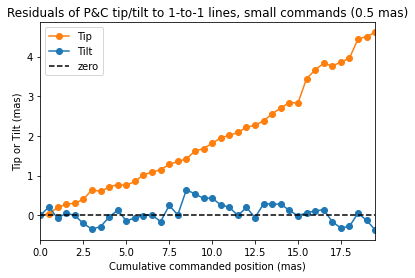

In [37]:
# 1-to-1 comparison, small commands

plot_resids(title_string="Residuals of P&C tip/tilt to 1-to-1 lines, small commands (0.5 mas)",
            best_fit_m_tip=1.,
            best_fit_b_tip=df_small["Tip"][0],
            best_fit_m_tilt=1.,
            best_fit_b_tilt=df_small["Tilt"][0],
            cmd_tt=small_cmd_tt,
            empir_tip=df_small["Tip"],
            empir_tilt=df_small["Tilt"])

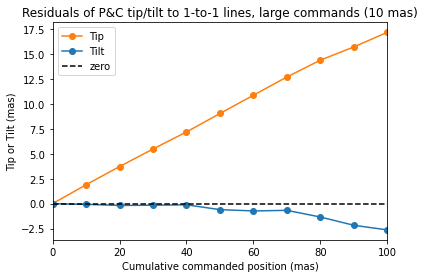

In [38]:
# 1-to-1 comparison, large commands

plot_resids(title_string="Residuals of P&C tip/tilt to 1-to-1 lines, large commands (10 mas)",
            best_fit_m_tip=1.,
            best_fit_b_tip=df_large["Tip"][0],
            best_fit_m_tilt=1.,
            best_fit_b_tilt=df_large["Tilt"][0],
            cmd_tt=large_cmd_tt,
            empir_tip=df_large["Tip"],
            empir_tilt=df_large["Tilt"])